# Function  Transformer 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
dataset=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\loan.csv")
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14872\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


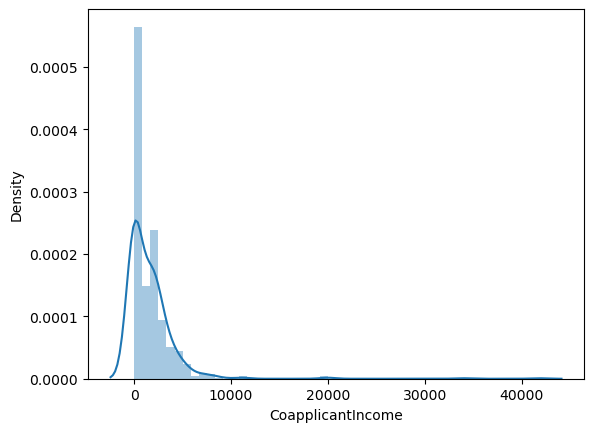

In [53]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [54]:
# outlier remove
q1=dataset["CoapplicantIncome"].quantile(0.25)
q3=dataset["CoapplicantIncome"].quantile(0.75)
iqr=q3-q1

In [57]:
min_r=q1-(1.5*iqr)
max_r=q3+(1.5*iqr)
min_r,max_r

(-3445.875, 5743.125)

In [59]:
dataset=dataset[dataset["CoapplicantIncome"]<max_r] 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14872\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


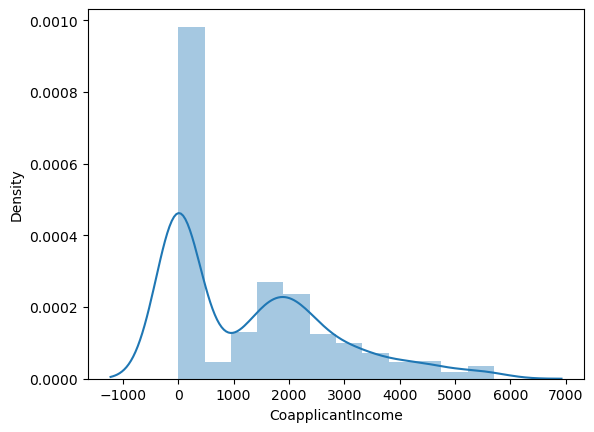

In [61]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [62]:
from sklearn.preprocessing import FunctionTransformer

In [65]:
ft=FunctionTransformer(func=np.log1p)
# log(0) & log10(0) & log(e)[0] =invalid hota hai 

In [67]:
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [69]:
ft.transform(dataset[["CoapplicantIncome"]])

,CoapplicantIncome
0,0.000000
1,7.319202
2,0.000000
3,7.765993
4,0.000000
...,...
609,0.000000
610,0.000000
611,5.484797
612,0.000000


In [71]:
dataset["CoapplicantIncome_tf"]=ft.transform(dataset[["CoapplicantIncome"]]) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14872\344308209.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf"])


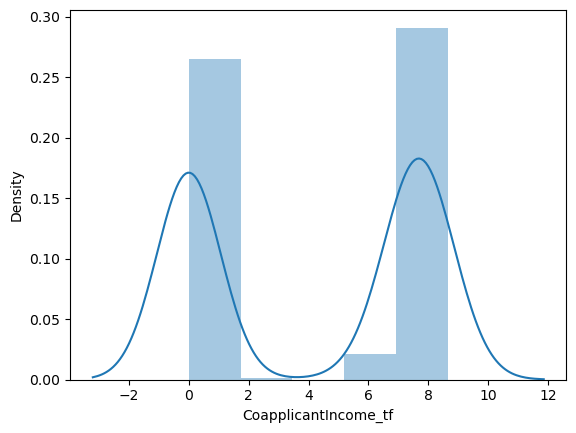

In [73]:
sns.distplot(dataset["CoapplicantIncome_tf"])
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14872\1964064914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14872\1964064914.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf"])


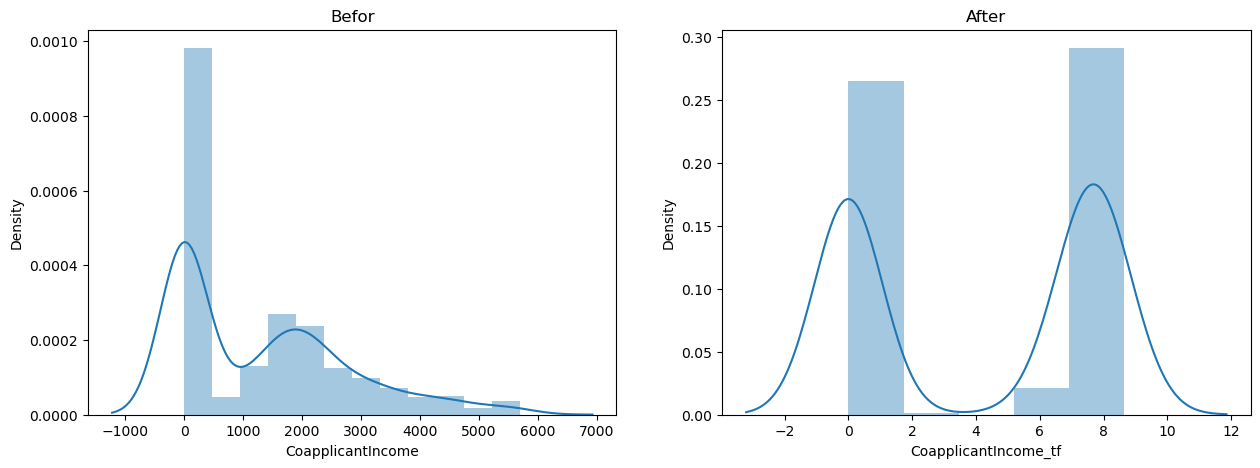

In [80]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Befor")

plt.subplot(1,2,2)
sns.distplot(dataset["CoapplicantIncome_tf"])
plt.title("After")
plt.show()

In [82]:
dataset=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\loan.csv")
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
from sklearn.preprocessing import FunctionTransformer

In [86]:
ft=FunctionTransformer(func=np.log1p)
# log(0) & log10(0) & log(e)[0] =invalid hota hai 

In [88]:
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [90]:
dataset["CoapplicantIncome_tf"]=ft.transform(dataset[["CoapplicantIncome"]]) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14872\1964064914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14872\1964064914.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf"])


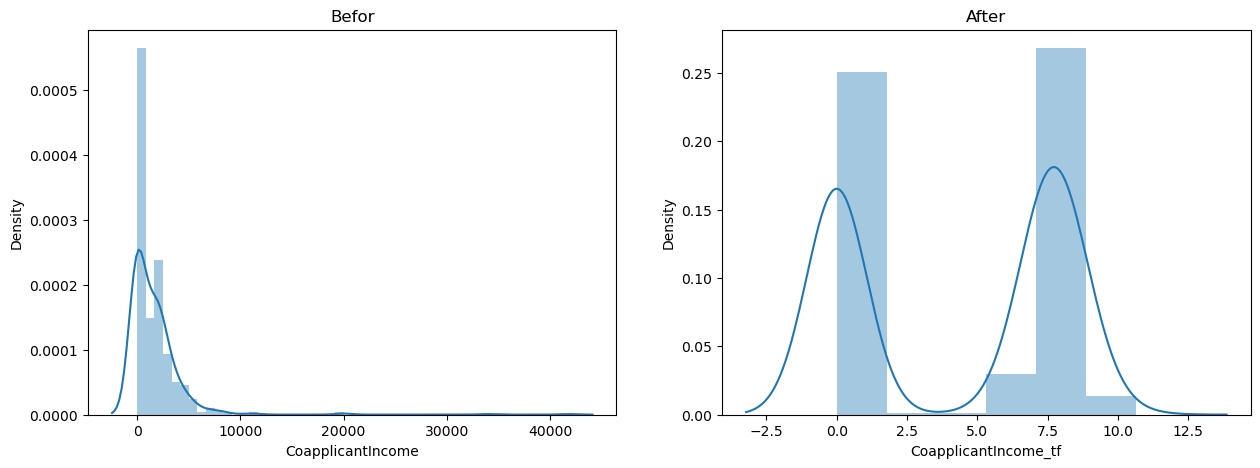

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Befor")

plt.subplot(1,2,2)
sns.distplot(dataset["CoapplicantIncome_tf"])
plt.title("After")
plt.show()

### es se yah or fayda hai ki agr apna outlier me data importtant ho ya hme data remove nhi krna hai to yah ouliier ko compress automatic hi kr leta hai .

In [105]:
dataset=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\loan.csv")
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [115]:
ft123=FunctionTransformer(func=lambda x : x**2)
ft123.fit(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome_tf123"]=ft.transform(dataset[["CoapplicantIncome"]]) 

# log1p ki jagah x**2 bhi use kr skte hai

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14872\952079460.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14872\952079460.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf123"])


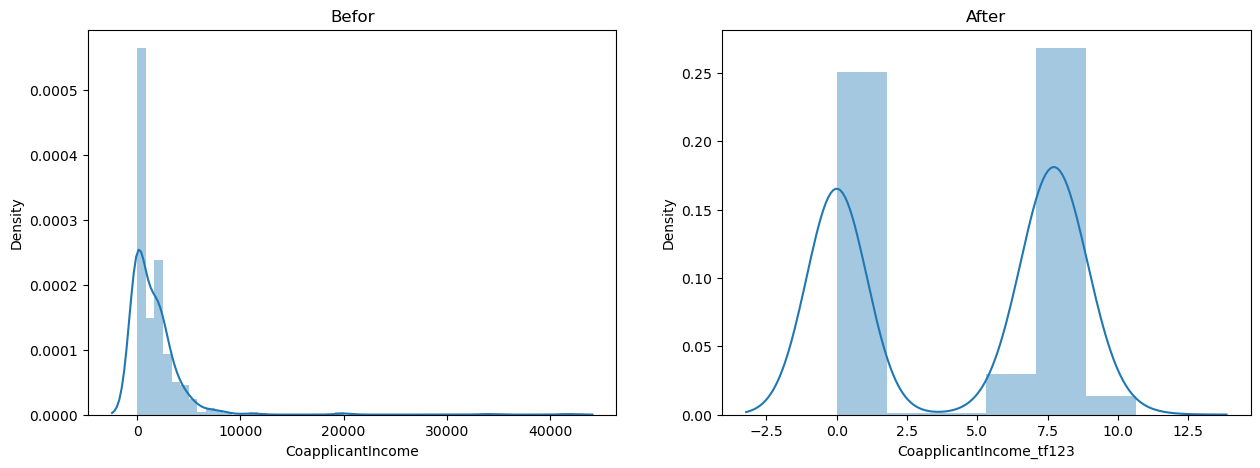

In [117]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Befor")

plt.subplot(1,2,2)
sns.distplot(dataset["CoapplicantIncome_tf123"])
plt.title("After")
plt.show()

In [120]:
# es se apna data normdistrubution me chnage hota hai